
1. import libraries

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint

import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('cropdata.csv')

df.dtypes

Country Code                    object
Country Name                    object
Item Code                        int64
Item_Maize                     float64
Item_Plantains                 float64
Item_Potatoes                  float64
Item_Rice                      float64
Item_Sorghum                   float64
Item_Soya beans                float64
Item_Sweet potatoes            float64
Item_Wheat                     float64
Item_Yams                      float64
Year                             int64
Yield_hg/ha                    float64
Flag                            object
CH4_kt                         float64
CO2_kt                         float64
CO2eq_kt                       float64
N2O_kt                         float64
TotalGHG_MtCO2eq               float64
AvgPrecipitation_mm/year       float64
AvgTemp_DegC                   float64
PesticidesTotal_kg/ha          float64
TempChange_DegC                float64
Insecticides_t                 float64
NutrientNitrogenTotal_kg/

2. select the features and the target

In [3]:
target = 'Yield_hg/ha'
features = [
'Item_Maize', 'Item_Plantains', 'Item_Potatoes', 'Item_Rice', 'Item_Sorghum','Item_Soya beans', 'Item_Sweet potatoes', 'Item_Wheat', 'Item_Yams', 'CH4_kt',
'CO2_kt', 'CO2eq_kt', 'N2O_kt', 'TotalGHG_MtCO2eq', 'AvgPrecipitation_mm/year','AvgTemp_DegC', 'PesticidesTotal_kg/ha', 'TempChange_DegC', 'Insecticides_t'
,'NutrientNitrogenTotal_kg/ha'
]

3. split the data, standardize the features

In [4]:
data = df[features + [target]]

X = data[features]
y = data[target]

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4A. ensemble bagging with random forest

In [5]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

5. Hyperparameter tuning (GridSearchCV or RandomizedSearchCV)

In [ ]:
param_dist = {
    'n_estimators': randint(100, 200),
    'max_depth': [None, 10, 20, 30],
}

random_search = RandomizedSearchCV(estimator=random_forest, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=10)
random_search.fit(X_train, y_train)
best_random_forest = random_search.best_estimator_
print("Best Random Forest parameters:", random_search.best_params_)

Best Random Forest parameters: {'max_depth': 20, 'n_estimators': 167}

In [5]:
best_random_forest = RandomForestRegressor(n_estimators=175, max_depth=20, random_state=42)
best_random_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=175, random_state=42)

6. model evaluation

In [6]:
#training set
y_train_pred = best_random_forest.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("Training Set Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_train)
print("Mean Absolute Error (MAE):", mae_train)
print("R-squared (R2) Score:", r2_train)
print("Root Mean Squared Error (RMSE):", rmse_train)

Training Set Model Evaluation Metrics:
Mean Squared Error (MSE): 135944981.35992765
Mean Absolute Error (MAE): 4592.224559554776
R-squared (R2) Score: 0.9837021903311084
Root Mean Squared Error (RMSE): 11659.544646337079


In [41]:
random_forest = RandomForestRegressor(n_estimators=175, max_depth=20, random_state=42, oob_score=True)
random_forest.fit(X_train, y_train)
oob_score = random_forest.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.9621619324309414


In [7]:
#testing set
y_pred = best_random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)
print("Root Mean Squared Error (RMSE):", rmse)

Model Evaluation Metrics:
Mean Squared Error (MSE): 320586845.63756025
Mean Absolute Error (MAE): 7218.48254599574
R-squared (R2) Score: 0.9616553379176538
Root Mean Squared Error (RMSE): 17904.9391408505


In [42]:
random_forest = RandomForestRegressor(n_estimators=175, max_depth=20, random_state=42, oob_score=True)
random_forest.fit(X_test, y_test)
oob_score = random_forest.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.9494201941984364


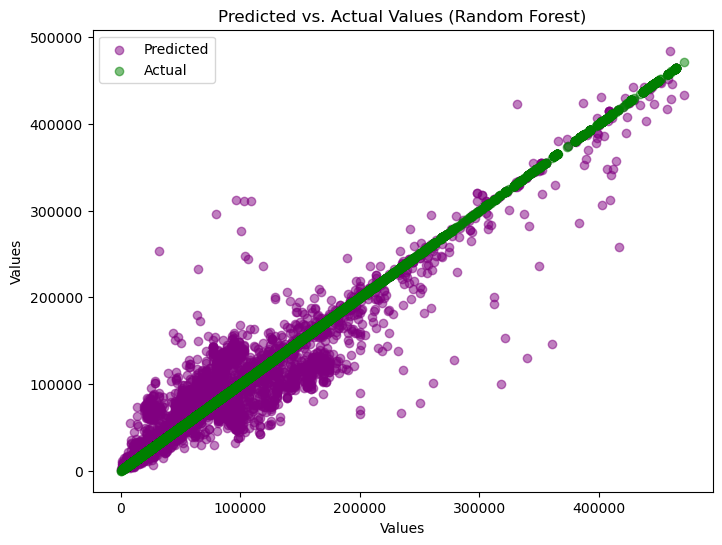

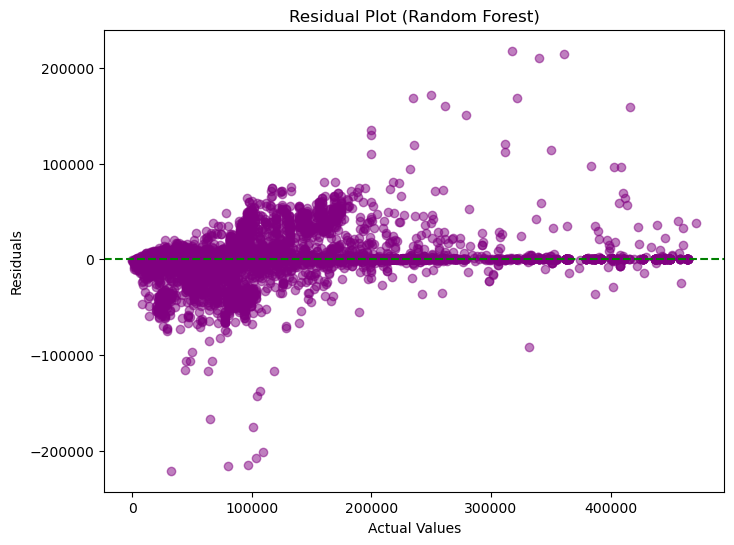

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple', label='Predicted')
plt.scatter(y_test, y_test, alpha=0.5, color='green', label='Actual')
plt.xlabel("Values")
plt.ylabel("Values")
plt.title("Predicted vs. Actual Values (Random Forest)")
plt.legend()
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(y=0, color='green', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

feature_importances_rf = np.mean([tree.feature_importances_ for tree in best_random_forest.estimators_], axis=0)
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

crop_features = ["Item_Maize", "Item_Plantains", "Item_Potatoes", "Item_Rice", "Item_Sorghum", "Item_Soya beans", "Item_Sweet potatoes", "Item_Wheat", "Item_Yams"]
non_crop_features = [feature for feature in features if feature not in crop_features]

feature_importance_filtered = feature_importance_df[feature_importance_df['Feature'].isin(non_crop_features)]

feature_importances_rf = np.zeros(X.shape[1])
for tree in best_random_forest.estimators_:
    feature_importances_bd += tree.feature_importances_

feature_importances_bd /= len(best_random_forest.estimators_)

sorted_idx = np.argsort(feature_importances_bd)[::-1]
sorted_idx_non_crop = [idx for idx in sorted_idx if features[idx] in non_crop_features]

print("Random Forest Feature Importance:")
for i in range(len(sorted_idx_non_crop)):
    feature_name = features[sorted_idx_non_crop[i]]
    importance = feature_importances_bd[sorted_idx_non_crop[i]]
    print(f"{feature_name}: {importance}")

Random Forest Feature Importance:
PesticidesTotal_kg/ha: 0.0821114248372204
CO2_kt: 0.08011115295130519
AvgPrecipitation_mm/year: 0.06311092118256738
TotalGHG_MtCO2eq: 0.04924843040659005
CH4_kt: 0.04319081856243166
NutrientNitrogenTotal_kg/ha: 0.03307622572186937
AvgTemp_DegC: 0.01967399135505457
N2O_kt: 0.014405393567397071
Insecticides_t: 0.011142627843558132
CO2eq_kt: 0.010608605769829844
TempChange_DegC: 0.0023975666804258405


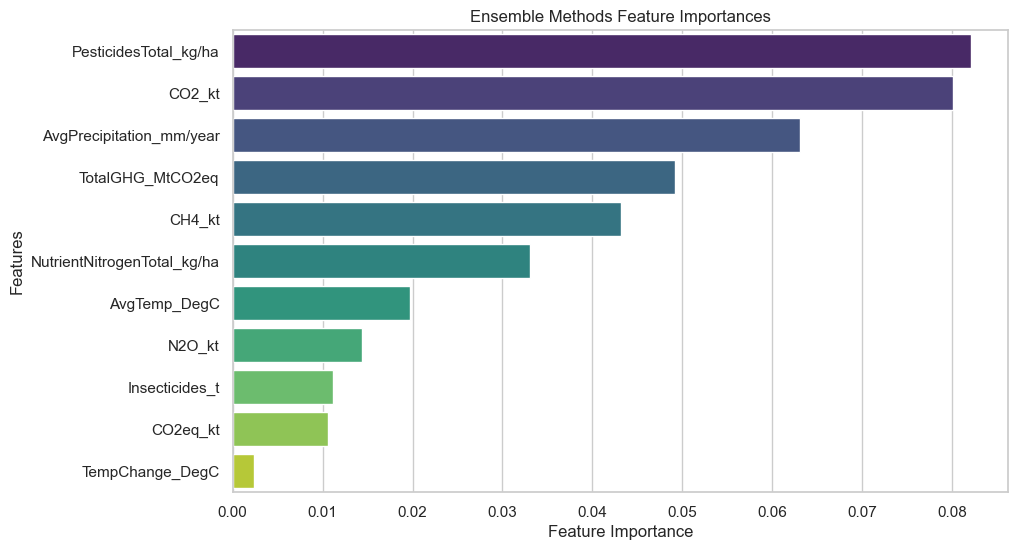

In [37]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.barplot(x=feature_importances_bd[sorted_idx_non_crop], y=np.array(features)[sorted_idx_non_crop], palette='viridis')
ax.set(xlabel='Feature Importance', ylabel='Features')
plt.title('Ensemble Methods Feature Importances')
plt.show()

4B. ensemble bagging with bagged decision trees

In [7]:
bagged_decision_trees = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20), n_estimators=100, random_state=42)
bagged_decision_trees.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=100, random_state=42)

5B. hyperparameter tuning

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

param_dist = {
    'n_estimators': randint(100, 200),
}

random_search_bd = RandomizedSearchCV(estimator=bagged_decision_trees, param_distributions=param_dist, scoring='neg_mean_squared_error', cv=5, n_iter=10)
random_search_bd.fit(X_train, y_train)
best_bagged_decision_trees = random_search_bd.best_estimator_
print("Best Bagged Decision Trees parameters:", random_search_bd.best_params_)

Best Bagged Decision Trees parameters: {'n_estimators': 183}


In [13]:
best_bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20), n_estimators=175, random_state=42)
best_bagging_model.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                 n_estimators=175, random_state=42)

6B. model evaluation

In [16]:
y_pred_bd = best_bagging_model.predict(X_train)
mse_bd = mean_squared_error(y_train, y_pred_bd)
mae_bd = mean_absolute_error(y_train, y_pred_bd)
r2_bd = r2_score(y_train, y_pred_bd)
rmse_bd = np.sqrt(mse_bd)

print("Training Set- Bagging Decision Trees Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_bd)
print("Mean Absolute Error (MAE):", mae_bd)
print("R-squared (R2) Score:", r2_bd)
print("Root Mean Squared Error (RMSE):", rmse_bd)

Training Set- Bagging Decision Trees Evaluation Metrics:
Mean Squared Error (MSE): 136051271.53025296
Mean Absolute Error (MAE): 4593.814680297235
R-squared (R2) Score: 0.9836894476984028
Root Mean Squared Error (RMSE): 11664.10183127072


In [43]:
best_bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20), n_estimators=175, random_state=42, oob_score=True)
best_bagging_model.fit(X_train, y_train)

oob_score = best_bagging_model.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.9620721516402049


In [30]:
y_pred_bd = best_bagging_model.predict(X_test)
mse_bd = mean_squared_error(y_test, y_pred_bd)
mae_bd = mean_absolute_error(y_test, y_pred_bd)
r2_bd = r2_score(y_test, y_pred_bd)
rmse_bd = np.sqrt(mse_bd)

print("Testing Set - Bagging Decision Trees Evaluation Metrics:")
print("Mean Squared Error (MSE):", mse_bd)
print("Mean Absolute Error (MAE):", mae_bd)
print("R-squared (R2) Score:", r2_bd)
print("Root Mean Squared Error (RMSE):", rmse_bd)

Testing Set - Bagging Decision Trees Evaluation Metrics:
Mean Squared Error (MSE): 321384227.50085855
Mean Absolute Error (MAE): 7220.505126002973
R-squared (R2) Score: 0.9615599648899864
Root Mean Squared Error (RMSE): 17927.192404301866


In [44]:
best_bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=20), n_estimators=175, random_state=42, oob_score=True)
best_bagging_model.fit(X_test, y_test)

oob_score = best_bagging_model.oob_score_
print("OOB Score:", oob_score)

OOB Score: 0.9493214891366508


8A. Plots and Other Visualisation for Ensemble Bagging Random Forest

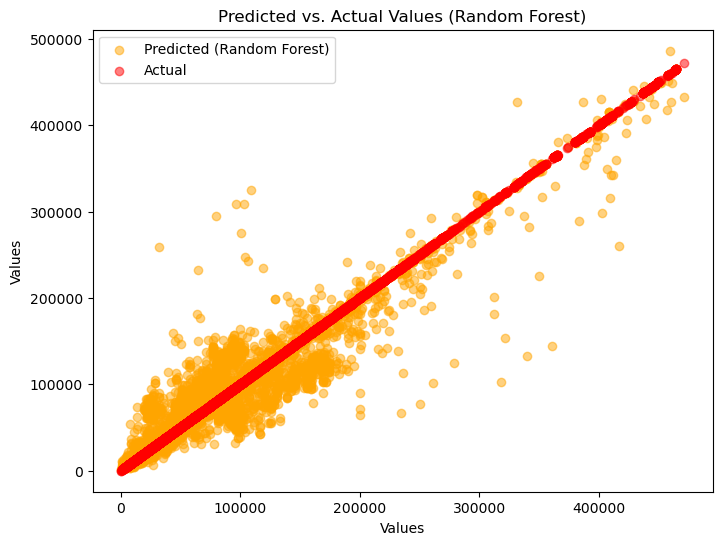

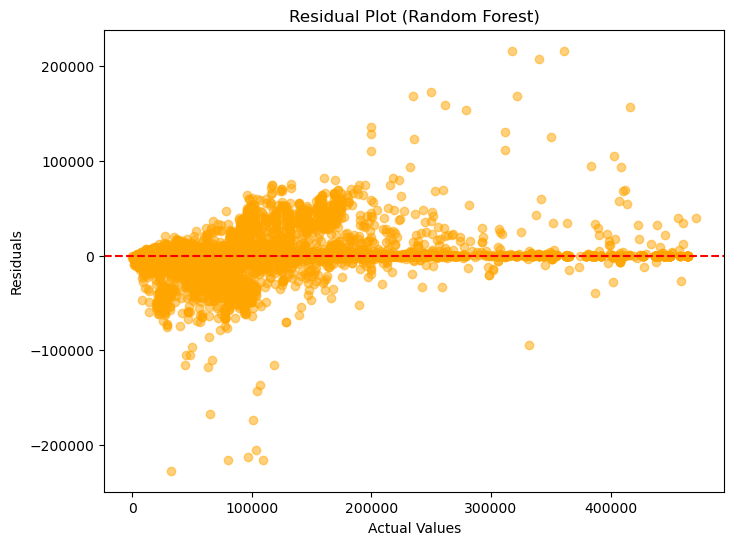

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_bd, alpha=0.5, color='orange', label='Predicted (Random Forest)')
plt.scatter(y_test, y_test, alpha=0.5, color='red', label='Actual')
plt.xlabel("Values")
plt.ylabel("Values")
plt.title("Predicted vs. Actual Values (Random Forest)")
plt.legend()
plt.show()

residuals_rf = y_test - y_pred_bd
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals_rf, alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Random Forest)")
plt.show()

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

feature_importances_bd = np.mean([tree.feature_importances_ for tree in best_bagging_model.estimators_], axis=0)
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances_bd})

crop_features = ["Item_Maize", "Item_Plantains", "Item_Potatoes", "Item_Rice", "Item_Sorghum", "Item_Soya beans", "Item_Sweet potatoes", "Item_Wheat", "Item_Yams"]
non_crop_features = [feature for feature in features if feature not in crop_features]

feature_importance_filtered = feature_importance_df[feature_importance_df['Feature'].isin(non_crop_features)]

feature_importances_bd = np.zeros(X.shape[1])
for tree in best_bagging_model.estimators_:
    feature_importances_bd += tree.feature_importances_

feature_importances_bd /= len(best_bagging_model.estimators_)

sorted_idx = np.argsort(feature_importances_bd)[::-1]
sorted_idx_non_crop = [idx for idx in sorted_idx if features[idx] in non_crop_features]

print("Bagged Decision Trees Feature Importance:")
for i in range(len(sorted_idx_non_crop)):
    feature_name = features[sorted_idx_non_crop[i]]
    importance = feature_importances_bd[sorted_idx_non_crop[i]]
    print(f"{feature_name}: {importance}")

Bagged Decision Trees Feature Importance:
PesticidesTotal_kg/ha: 0.08157867220566352
CO2_kt: 0.07974614837876268
AvgPrecipitation_mm/year: 0.06309890070226853
TotalGHG_MtCO2eq: 0.048609828435490846
CH4_kt: 0.04283519153469014
NutrientNitrogenTotal_kg/ha: 0.0334254667755586
AvgTemp_DegC: 0.01955159779468617
N2O_kt: 0.013916730892223377
Insecticides_t: 0.010973804324232568
CO2eq_kt: 0.010575556399160734
TempChange_DegC: 0.002416022836287488


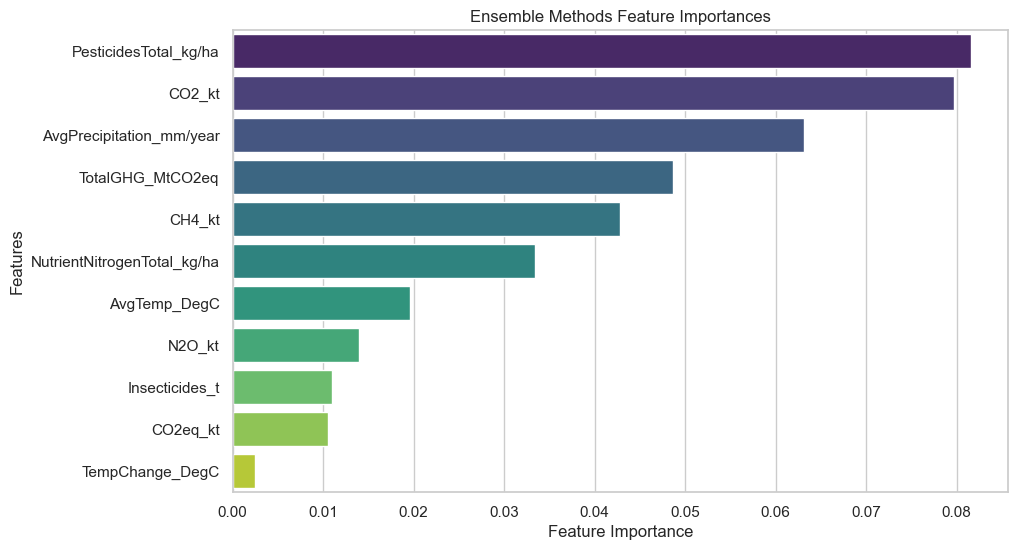

In [27]:
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')
ax = sns.barplot(x=feature_importances_bd[sorted_idx_non_crop], y=np.array(features)[sorted_idx_non_crop], palette='viridis')
ax.set(xlabel='Feature Importance', ylabel='Features')
plt.title('Ensemble Methods Feature Importances')
plt.show()